### IDs:
Insert yours IDs to the cell below

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [12]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [ ]:
# Solution 1
from scipy.stats import binom

def get_defective_from_sample(wanted_prob_defective,prob_sample, num_of_defectives):
    number_of_samples = num_of_defectives
    x=binom(number_of_samples,prob_sample)
    exceed = False
    while exceed == False:
        if wanted_prob_defective < 1 - x.cdf(num_of_defectives-1):
            exceed = True
        else:
            number_of_samples += 1
            x=binom(number_of_samples,prob_sample)
    return number_of_samples

In this solution we iterated over different binomial distributions increasing the number of trials (independent samples) until we got $P(X>=No. \ of \ Defectives)=1-CDF(No. \ of \ Defectives-1)$ to be larger than the wanted probability. This indicates that we achieved a number of trials that will give us at least the probability asked.

In [ ]:
# solution 2
from scipy.stats import nbinom

def get_defective_from_sample_2(wanted_prob_defective,prob_sample, num_of_defectives):
    return nbinom.ppf(q=wanted_prob_defective, n=num_of_defectives, p=prob_sample, loc=num_of_defectives)

In this solution we used the Percent Point Function (the inverse of CDF) on the a Negative Binomial Distribution. This gives us the number of trials we need in order to achieve at least the number of defectives asked.

In [ ]:
print(get_defective_from_sample(0.85, 0.03, 1))
print(get_defective_from_sample_2(0.85, 0.03, 1))

63
63.0


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [ ]:
print(get_defective_from_sample(0.95,0.04,1))
print(get_defective_from_sample_2(0.95,0.04,1))

74
74.0


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [ ]:
print(get_defective_from_sample(0.90,0.1,5))

print(get_defective_from_sample(0.90,0.3,15))

78
64


x1 Mean:50.00, x1 Var:450.00
x2 Mean:50.00, x1 Var:116.67


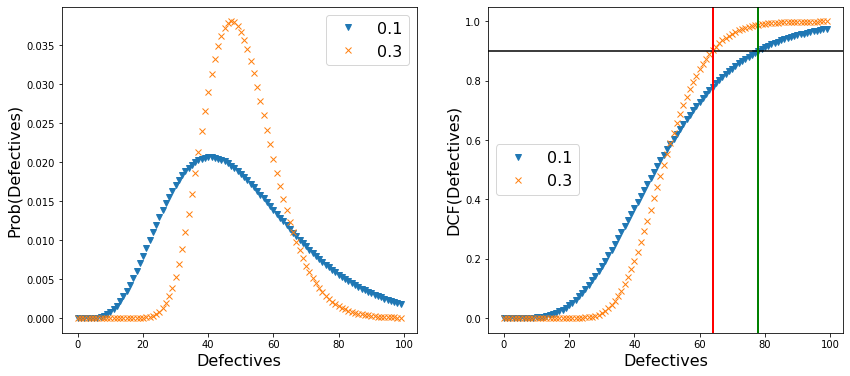

In [15]:
from scipy.stats import nbinom
x1 = nbinom(5, 0.1, loc=5)
x2 = nbinom(15, 0.3, loc =15)
#i =  range(0, 40)
i = range(0,int(round(2*5/0.1,0)))
p_x1 = x1.pmf([xx for xx in i])
p_x2 = x2.pmf([xx for xx in i])
cdf_x1 = x1.cdf([xx for xx in i])
cdf_x2 = x2.cdf([xx for xx in i])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(i, p_x1,'v',label='0.1')
plt.plot(i,p_x2,'x',label='0.3')
plt.xlabel("Defectives", fontsize = 16)
plt.ylabel("Prob(Defectives)", fontsize = 16)
plt.legend(fontsize=16);
plt.subplot(1,2,2)
plt.plot(i, cdf_x1,'v',label='0.1')
plt.plot(i,cdf_x2,'x',label='0.3')
plt.xlabel("Defectives", fontsize = 16)
plt.ylabel("DCF(Defectives)", fontsize = 16)
plt.axhline(y= 0.9, color='k')
plt.axvline(x= 64, linewidth=2, color='r')
plt.axvline(x= 78, linewidth=2, color='g')

plt.legend(fontsize=16);

print("x1 Mean:{:.2f}, x1 Var:{:.2f}".format(x1.mean(),x1.var()))
print("x2 Mean:{:.2f}, x1 Var:{:.2f}".format(x2.mean(),x2.var()))

Let try to visualize which one of the distributions is 'quicker', in terms of samples, to reach its number of defectives

In [16]:

upper = []
for i in range(0, 80):
    sum=0
    for j in range(5, i):
        sum+=x1.pmf(j)*(1-x2.cdf(j-1))
    upper.append(1-sum)
lower = []
for i in range(0, 80):
    sum=0
    for j in range(15, i):
        sum += x2.pmf(j)*(1-x1.cdf(j))
    lower.append(sum)

P(x1>x2) [0.45134620397558717,0.4524644697261766]


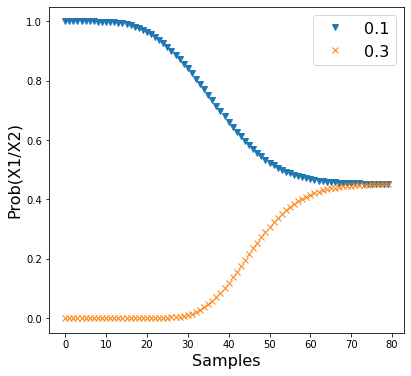

In [17]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(range(0, 80), upper,'v',label='0.1')
plt.plot(range(0, 80),lower,'x',label='0.3')
plt.xlabel("Samples", fontsize = 16)
plt.ylabel("Prob(X1/X2)", fontsize = 16)
plt.legend(fontsize=16);
print("P(x1>x2) [{},{}]".format(lower[-1],upper[-1]))

The probability that $X1>X2$ is lower than 0.5, Thus $X2$ is likely to reach 15 defectives 'quicker' then $X1$ reach 5 defectives, corresponding to our initial results

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.
Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

RG Median:4600.0, RG Mean:4200.0, RG IQR:3200.0
SH Median:4600.0, SH Mean:6300.0, SH IQR:3100.0


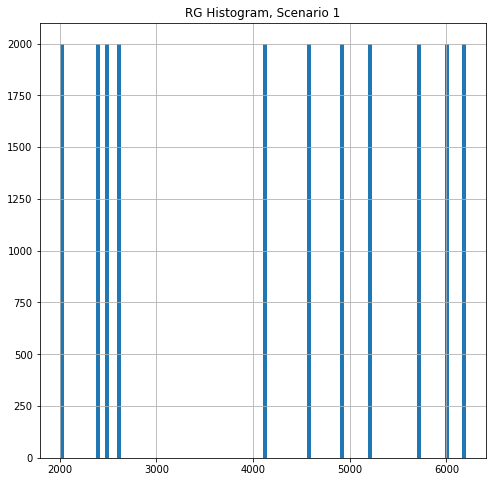

In [3]:
rg_size = 22000
rg = np.array([2000,2400,2500,2600,4100,4600,4900,5200,5700,6000,6200] * int(rg_size/11))
rg_median = np.median(rg)
rg_mean = np.mean(rg)
rg_iqr = np.percentile(rg,75) - np.percentile(rg,25)
print("RG Median:{}, RG Mean:{}, RG IQR:{}".format(rg_median,rg_mean, rg_iqr))

sh_size = 16000
sh = np.array([4100,4200,4300,4400,4500,4600,7200,7300,7400,10500,10800] * int(sh_size/11))
sh_median = np.median(sh)
sh_mean = np.mean(sh)
sh_iqr = np.percentile(sh,75) - np.percentile(sh,25)
print("SH Median:{}, SH Mean:{}, SH IQR:{}".format(sh_median,sh_mean, sh_iqr))

pd.DataFrame(rg).hist(bins=100, figsize=(8,8))
plt.title('RG Histogram, Scenario 1');

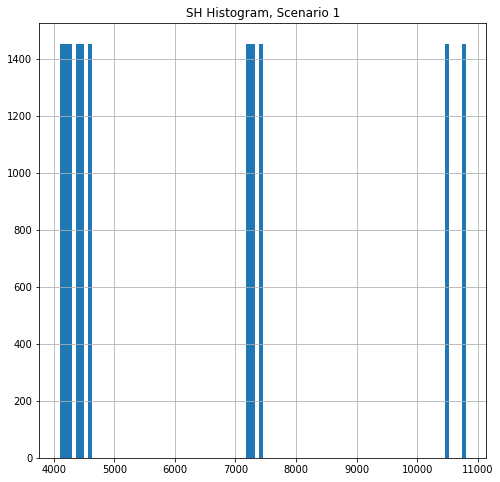

In [ ]:
pd.DataFrame(sh).hist(bins=100, figsize=(8,8))
plt.title('SH Histogram, Scenario 1');

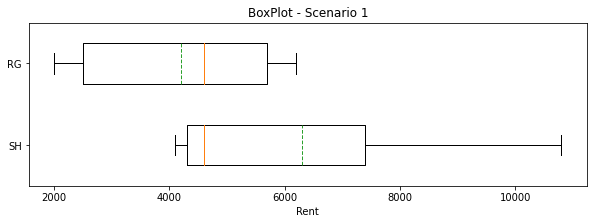

In [18]:
fig = plt.figure()
fig.set_size_inches(10, 3)
ax = plt.axes()
ax.boxplot([sh,rg], labels =['SH','RG'], vert=False, showmeans=True, showcaps=True, meanline = True, showfliers = True, widths=0.5)
ax.set_title('BoxPlot - Scenario 1')
ax.set_xlabel('Rent')
plt.show();


RG2 Median:4600.0, RG2 Mean:4200.0, RG2 IQR:8200.0
SH2 Median:4600.0, SH2 Mean:6300.0, SH2 IQR:3500.0


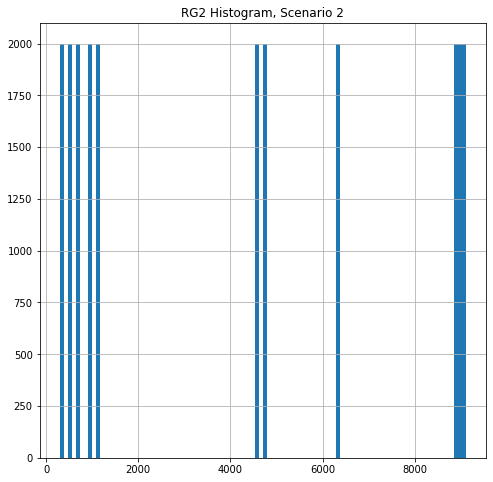

In [7]:
rg_size = 22000
rg2 = np.array([300,500,700,1000,1100,4600,4700,6300,8900,9000,9100] * int(rg_size/11))
rg_median = np.median(rg2)
rg_mean = np.mean(rg2)
rg_iqr = np.percentile(rg2,75) - np.percentile(rg2,25)
print("RG2 Median:{}, RG2 Mean:{}, RG2 IQR:{}".format(rg_median,rg_mean, rg_iqr))

sh_size = 16000
sh2 = np.array([3600,3800,3900,4400,4500,4600,7200,7300,7400,11000,11600] * int(sh_size/11))
sh_median = np.median(sh2)
sh_mean = np.mean(sh2)
sh_iqr = np.percentile(sh2,75) - np.percentile(sh2,25)
print("SH2 Median:{}, SH2 Mean:{}, SH2 IQR:{}".format(sh_median,sh_mean, sh_iqr))

pd.DataFrame(rg2).hist(bins=100, figsize=(8,8))
plt.title('RG2 Histogram, Scenario 2');

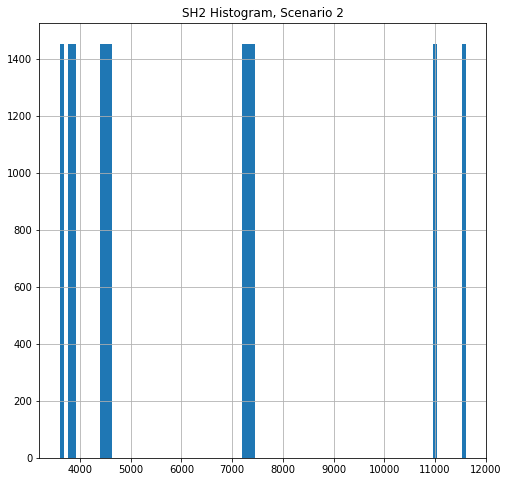

In [ ]:
pd.DataFrame(sh2).hist(bins=100, figsize=(8,8))
plt.title('SH2 Histogram, Scenario 2');

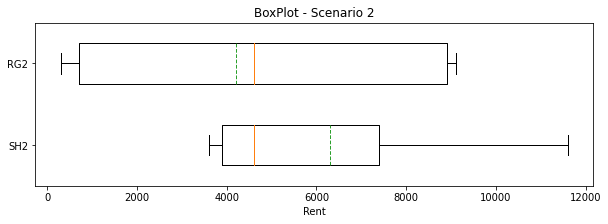

In [19]:
fig = plt.figure()
fig.set_size_inches(10, 3)
ax = plt.axes()
ax.boxplot([sh2,rg2], labels =['SH2','RG2'], vert=False, showmeans=True, showcaps=True, meanline = True, showfliers = True, widths=0.5)
ax.set_title('BoxPlot - Scenario 2')
ax.set_xlabel('Rent')
plt.show();


#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [9]:
rg_size = 22000
rg3 = np.array([2000,2300,2500,2600,4100,4600,5000,5200,5700,6000,6200] * int(rg_size/11))
rg_median = np.median(rg3)
rg_mean = np.mean(rg3)
rg_iqr = np.percentile(rg3,75) - np.percentile(rg3,25)
print("RG3 Median:{}, RG3 Mean:{}, RG3 IQR:{}".format(rg_median,rg_mean, rg_iqr))

sh_size = 16000
sh3 = np.array([4000,4200,4300,4400,4500,4600,7200,7300,7400,10600,10800] * int(sh_size/11))
sh_median = np.median(sh3)
sh_mean = np.mean(sh3)
sh_iqr = np.percentile(sh3,75) - np.percentile(sh3,25)
print("SH3 Median:{}, SH3 Mean:{}, SH3 IQR:{}".format(sh_median,sh_mean, sh_iqr))

sh3_var = np.var(sh3)
rg3_var = np.var(rg3)
print("RG3 VAR:{}, SH3 VAR:{}".format(rg3_var , sh3_var))


RG3 Median:4600.0, RG3 Mean:4200.0, RG3 IQR:3200.0
SH3 Median:4600.0, SH3 Mean:6300.0, SH3 IQR:3100.0
RG3 VAR:2290909.090909091, SH3 VAR:5927272.7272727275


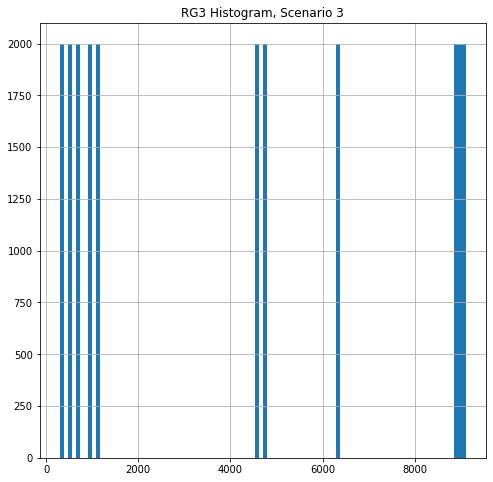

In [ ]:
pd.DataFrame(rg2).hist(bins=100, figsize=(8,8))
plt.title('RG3 Histogram, Scenario 3');

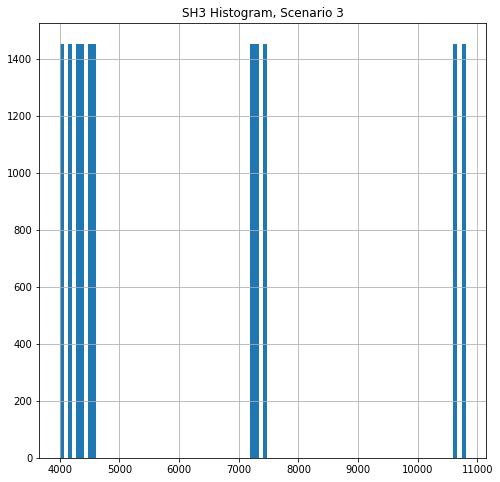

In [ ]:
pd.DataFrame(sh3).hist(bins=100, figsize=(8,8))
plt.title('SH3 Histogram, Scenario 3');

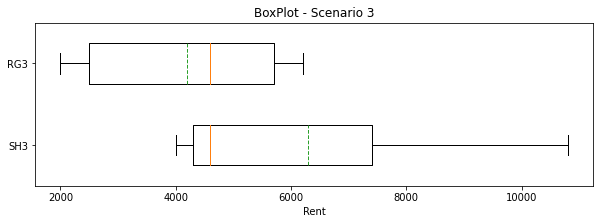

In [11]:
fig = plt.figure()
fig.set_size_inches(10, 3)
ax = plt.axes()
ax.boxplot([sh3,rg3], labels =['SH3','RG3'], vert=False, showmeans=True, showcaps=True, meanline = True, showfliers = True, widths=0.5)
ax.set_title('BoxPlot - Scenario 3')
ax.set_xlabel('Rent')
plt.show();


The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [ ]:
sh3 = np.array([4000,4200,4300,4400,4500,4600,7200,7300,7400,10600,10800] * int(sh_size/11))
sh_phi = np.array([6222,  7885,  8766, 9267,  9307, 12000, 13545, 14324, 16572, 19754, 19858] * int(sh_size/11))
sh_phi_median = np.median(sh_phi)
sh_phi_mean = np.mean(sh_phi)
print("SH PHI Median:{}, SH PHI Mean:{}".format(sh_phi_median,sh_phi_mean))

rg3 = np.array([2000,2300,2500,2600,4100,4600,5000,5200,5700,6000,6200] * int(rg_size/11))
rg_phi = np.array([5572,  6462,  6777,  7115,  7155,  8000,  8466,  8495, 10458, 11888, 13112]* int(rg_size/11))
rg_phi_median = np.median(rg_phi)
rg_phi_mean = np.mean(rg_phi)
print("RG PHI Median:{}, RG PHI Mean:{}".format(rg_phi_median,rg_phi_mean))

SH PHI Median:12000.0, SH PHI Mean:12500.0
RG PHI Median:8000.0, RG PHI Mean:8500.0


In [ ]:
#the covariance(rent,PHI) based on the formula:
exp_cov_sh = 0.97 * np.var(sh_phi)**0.5 * np.var(sh3)**0.5
exp_cov_rg = 0.89 * np.var(rg_phi)**0.5 * np.var(rg3)**0.5
[exp_cov_rg, exp_cov_sh]

[3046382.884978661, 10640438.529357864]

In [ ]:
#the covariance based on the distributions:
cov_sh = np.cov(sh3,sh_phi)[0,1]
cov_rg = np.cov(rg3,rg_phi)[0,1]
#the ratio is no greater then 1%
[cov_rg/exp_cov_rg , cov_sh/exp_cov_sh]

[1.003339774295629, 0.9901603697931426]

#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

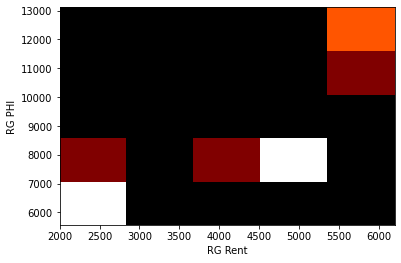

In [ ]:
plt.hist2d(x=rg,y=rg_phi,cmap='gist_heat',bins=5)
plt.xlabel('RG Rent')
plt.ylabel('RG PHI')
plt.show()

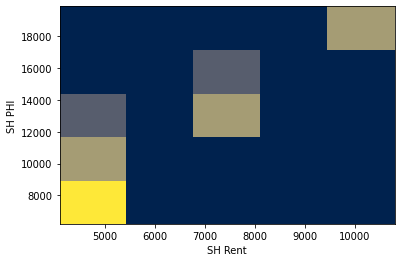

In [ ]:
plt.hist2d(x=sh,y=sh_phi,cmap='cividis',bins=5)
plt.xlabel('SH Rent')
plt.ylabel('SH PHI')
plt.show()

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

In [ ]:
import scipy.stats as stats

In [ ]:
rv = stats.multinomial(20, [0.2,0.1,0.1,0.1,0.2,0.3])
exp = rv.rvs(size=100)
y = exp[:,1:4].sum(axis=1)
empiricalM = stats.moment(y, moment=3)
binomialM = 20*0.3*(1-0.3)*(1-0.6)
print(empiricalM)
print(binomialM)

1.6781733203708162
1.6799999999999997


There is an obvious difference between the two results. one is the theoretical centralized third moment of the distribution and the other one is the empirical centralized third moment which is based on a sample and computed as follows:

$ m_{3}=\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\overline{x})^{3} $

The mean is based on the sample data and is different than the theoretical one.
As we increase the number of experiments to a larger number the two values will converge.


### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

1. **What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables?** \

By using the following: $$ Var(X+Y) = Var(X) + Var(Y) + 2Cov(X,Y) $$
\begin{align}
        Var(X+Y+Z) &= Var(X) + Var(Y+Z) + 2Cov(X,Y+Z) \\
        &= Var(X) + Var(Y) + Var(Z) + 2Cov(Y,Z) + 2Cov(X,Y+Z) \\[1em]
    \end{align}


By using the following: $$Cov(X,Y) = E(XY) - E(X)E(Y)$$
We'll calculate: $$Cov(X,Y+Z)$$ <br/>
\begin{align}
        Cov(X,Y+Z) &= E(X(Y+Z)) - E(X)E(Y+Z) \\
        &= E(XY+XZ) - E(X)E(Y+Z)\\
        \text{By linearity of Expectations: } \\
        &= E(XY) + E(XZ) - E(X)(E(Y) + E(Z)) \\
        &= [E(XY) - E(X)E(Y)] + [E(XZ) - E(X)E(Z)] \\
        &= Cov(X,Y) + Cov(X,Z)
    \end{align}

By using the following: $$Cov(X,Y) = E(XY) - E(X)E(Y)$$
We'll calculate: $$Cov(X,Y+Z)$$ \

\begin{align}
        Cov(X,Y+Z) &= E(X(Y+Z)) - E(X)E(Y+Z) \\
        &= E(XY+XZ) - E(X)E(Y+Z)\\
        \text{By linearity of Expectations:} \\
        &= E(XY) + E(XZ) - E(X)(E(Y) + E(Z)) \\
        &= [E(XY) - E(X)E(Y)] + [E(XZ) - E(X)E(Z)] \\
        &= Cov(X,Y) + Cov(X,Z)
    \end{align}

Hence we get:
$$Var(X+Y+Z) = Var(X) + Var(Y) + Var(Z) + 2[Cov(X,Y) + Cov(X,Z) + Cov(Y,Z)]$$ <br/>

2. **What happens if X,Y,Z are pairwise independent?** <br/>

If they are pairwise independent that means the covariance between each random variable will be 0. <br/>
Hence: $$ Var(X+Y+Z) = Var(X) + Var(Y) + Var(Z)$$ <br/>

3. **If X,Y,Z are pairwise independent, are they necessarily collectively independent?** <br/>

Counterexample to show that the above does not hold:<br/><br/>

Suppose $X,Y$ are two independent tosses of a fair coin, designating 1 for heads and 0 for tail. Let the third random variable $Z$ be the sum modulo 2 of the others.<br/>

$X,Y,Z$ has the following probability distribution:<br/>

$$
(X,Y,Z) =\left\{
    \begin{array}\\
        (0,0,0) & \mbox{with probability 1/4,} \\
        (0,1,1) & \mbox{with probability 1/4,} \\
        (1,0,1) & \mbox{with probability 1/4,} \\
        (1,1,0) & \mbox{with probability 1/4.}
    \end{array}
\right.
$$
<br/>
The margnial probability distributions are identical:<br/>

$$
P_X(0)=P_Y(0)=P_Z(0)=1/2 \\
P_X(1)=P_Y(1)=P_Z(1)=1/2
$$

Looking at the bivariate distributions we also get:<br/>

$$P_{X,Y}=P_{X,Z}=P_{Y,Z}$$

Where $$P_{X,Y}(0,0)=P_{X,Y}(0,1)=P_{X,Y}(1,0)=P_{X,Y}(1,1)=1/4$$<br/>

Since each of the pairwise joint distributions equals the product of their respective marginal distributions, the variabls are pairwise independent.<br/>

However, $X,Y,Z$ are **not** collectively independent, since:
$$P_{X,Y,Z} \ne P_X(x)P_Y(y)P_Z(z)$$<br/>

For example,
$$P_{X,Y,Z}(0,0,0)=1/4 \ne 1/8=P_X(0)P_Y(0)P_Z(0)$$

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [ ]:
from scipy.stats import rv_discrete

In [ ]:
def Conv(x1, x2):
    q =[]
    minV = x1.support()[0] + x2.support()[0]
    maxV = x1.support()[1] + x2.support()[1]
    for i in range(minV, maxV+1):
        sump = 0
        for j in range(i):
            sump += (x1.pmf(j)*x2.pmf(i-j))
        q.append(sump)
    return rv_discrete(values=(range(minV,maxV+1),q))


In [ ]:
def NFoldConv(P , n):
    if n == 0:
        return []
    if n == 1:
        return P
    Q = NFoldConv(P,n-1)
    Q = Conv(Q,P)
    return Q

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [ ]:
P = rv_discrete(values=([1,2,3,4,5,6,7,8],[1/8]*8))
Q = NFoldConv(P, 17)
print(Q.xk)
print(Q.pk)

[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136]
[4.44089210e-16 7.54951657e-15 6.79456491e-14 4.30322444e-13
 2.15161222e-12 9.03677133e-12 3.31348282e-11 1.08871578e-10
 3.26607186e-10 9.07134812e-10 2.35772912e-09 5.78267301e-09
 1.34733957e-08 2.99840073e-08 6.40173488e-08 1.31615841e-07
 2.61380925e-07 5.02742224e-07 9.38663699e-07 1.70459936e-06
 3.01597023e-06 5.20688185e-06 8.78316811e-06 1.44930374e-05
 2.34184931e-05 3.70901651e-05 5.76270894e-05 8.79011761e-05
 1.31723541e-04 1.94046516e-04 2.81171100e-04 4.00945025e-04
 5.62931924e-04 7.785276